In [1]:
import pandas as pd
df=pd.read_csv('c:/data/mart/mart.csv')
df.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,...,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn,amount,class
0,1,0,0,0,1,1,0,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,7,0
1,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,655,1
2,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,282,1
3,1,0,0,0,1,0,1,0,0,0,...,1,4.0,3.5,-3.3,1.2,73,1.6,0.0,35,0
4,1,0,0,0,1,0,1,0,0,0,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,183,1


In [2]:
train_cols=df.columns[0:19] #0~18
X=df[train_cols] #독립변수
y=df['class'] #종속변수
X.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,drink,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn
0,1,0,0,0,1,1,0,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
1,1,0,0,0,1,0,1,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
2,1,0,0,0,1,0,1,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
3,1,0,0,0,1,0,1,0,0,0,0,1,4.0,3.5,-3.3,1.2,73,1.6,0.0
4,1,0,0,0,1,0,1,0,0,0,1,0,4.0,3.5,-3.3,1.2,73,1.6,0.0


In [3]:
#로지스틱 회귀분석
import statsmodels.api as sm
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit()
print(result.summary2()) # 요약정보
#모형의 설명력 : 42.5%
#유의하지 않은 변수들: max_ta,max_ws,avg_rhm,avg_ws,sum_rn

Optimization terminated successfully.
         Current function value: 0.246488
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.576     
Dependent Variable: class            AIC:              14823.2519
Date:               2023-04-19 11:08 BIC:              14964.5041
No. Observations:   30000            Log-Likelihood:   -7394.6   
Df Model:           16               LL-Null:          -17422.   
Df Residuals:       29983            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
seoul     -0.6686        nan       nan      nan       nan       nan
incheon   -3.3275        nan       nan      nan       nan 

In [4]:
df.columns

Index(['seoul', 'incheon', 'gyungi', 'male', 'female', 'age10', 'age2030',
       'age4050', 'age60', 'food', 'drink', 'product', 'max_ta', 'max_ws',
       'min_ta', 'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn', 'amount', 'class'],
      dtype='object')

In [5]:
#후진제거법
#최종적으로 선택한 독립변수
train_cols=['seoul', 'incheon', 'gyungi', 'male', 'female',
            'age10', 'age2030','age4050', 'age60', 'food',
            'drink', 'product','max_ta', 'max_ws','min_ta',
            'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn']
df['class'].value_counts() #샘플링 전의 0,1 분포

0    21976
1     8024
Name: class, dtype: int64

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['class'].value_counts() #샘플링 후의 0,1 분포

0    8024
1    8024
Name: class, dtype: int64

In [7]:
#샘플링 데이터셋에서 X,y 선택
X=X_samp[train_cols]
y=y_samp['class']

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.7355435231437558


In [10]:
#다양한 알고리즘별 정확도를 저장할 리스트
scores=[]
scores.append(grid.best_score_)
scores

[0.7355435231437558]

##### 의사결정나무

In [11]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4}
0.7468201993093885


In [12]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885]

In [14]:
tree=grid.best_estimator_['clf']

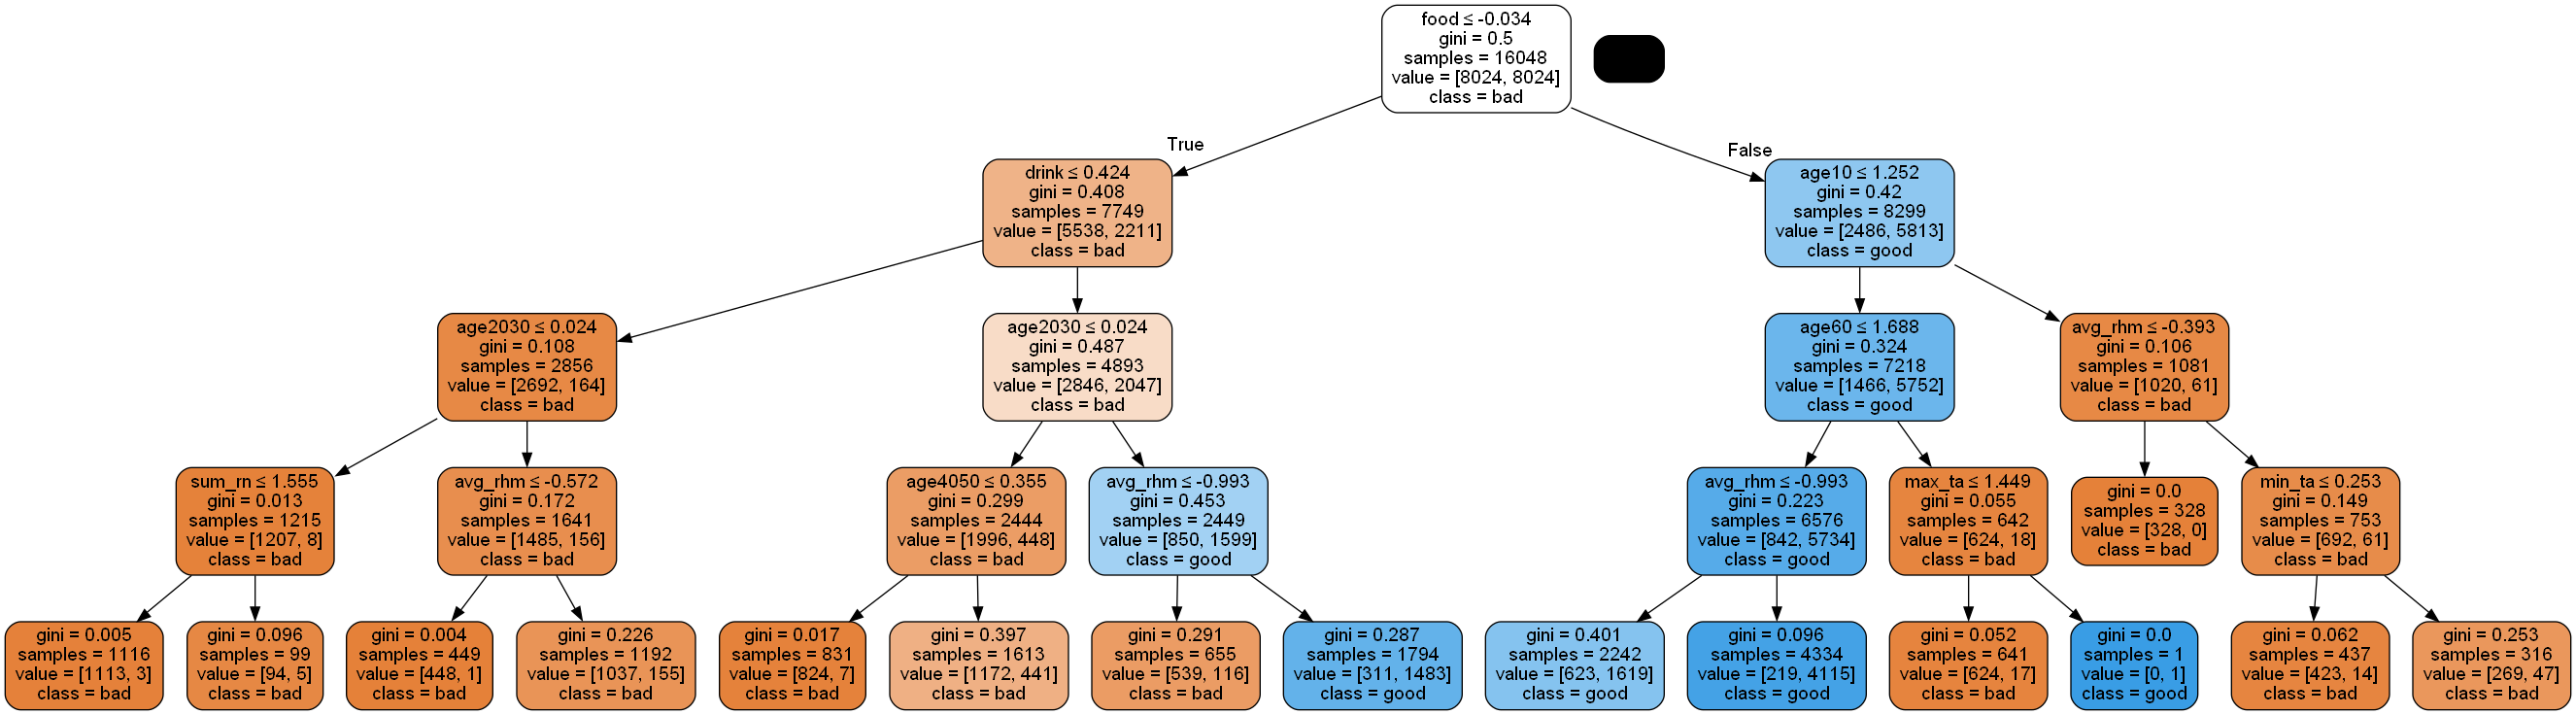

In [15]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=train_cols, 
                           class_names=["bad","good"],
                           filled=True, rounded=True, 
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

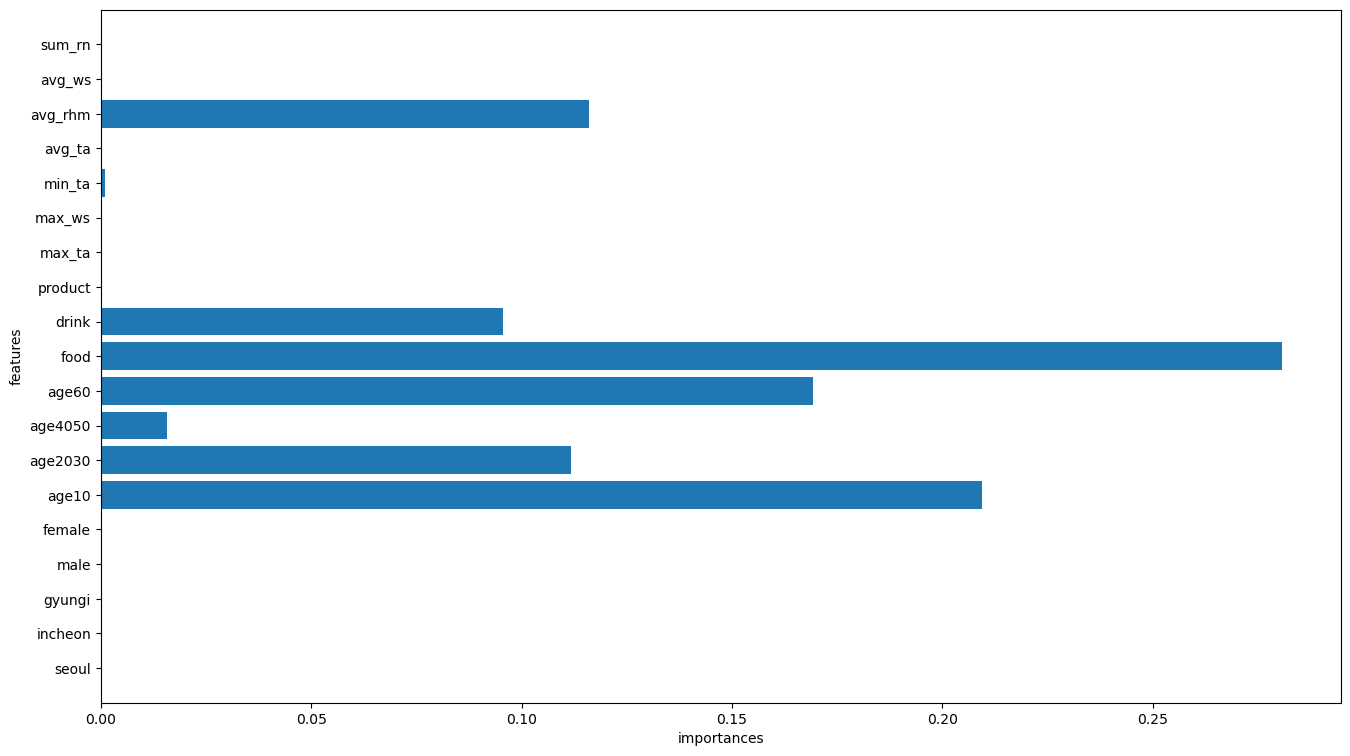

In [17]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree) #food>age10>age60

##### 랜덤포레스트

In [18]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6)),
 'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 40}
0.6850649930781602


In [19]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885, 0.6850649930781602]

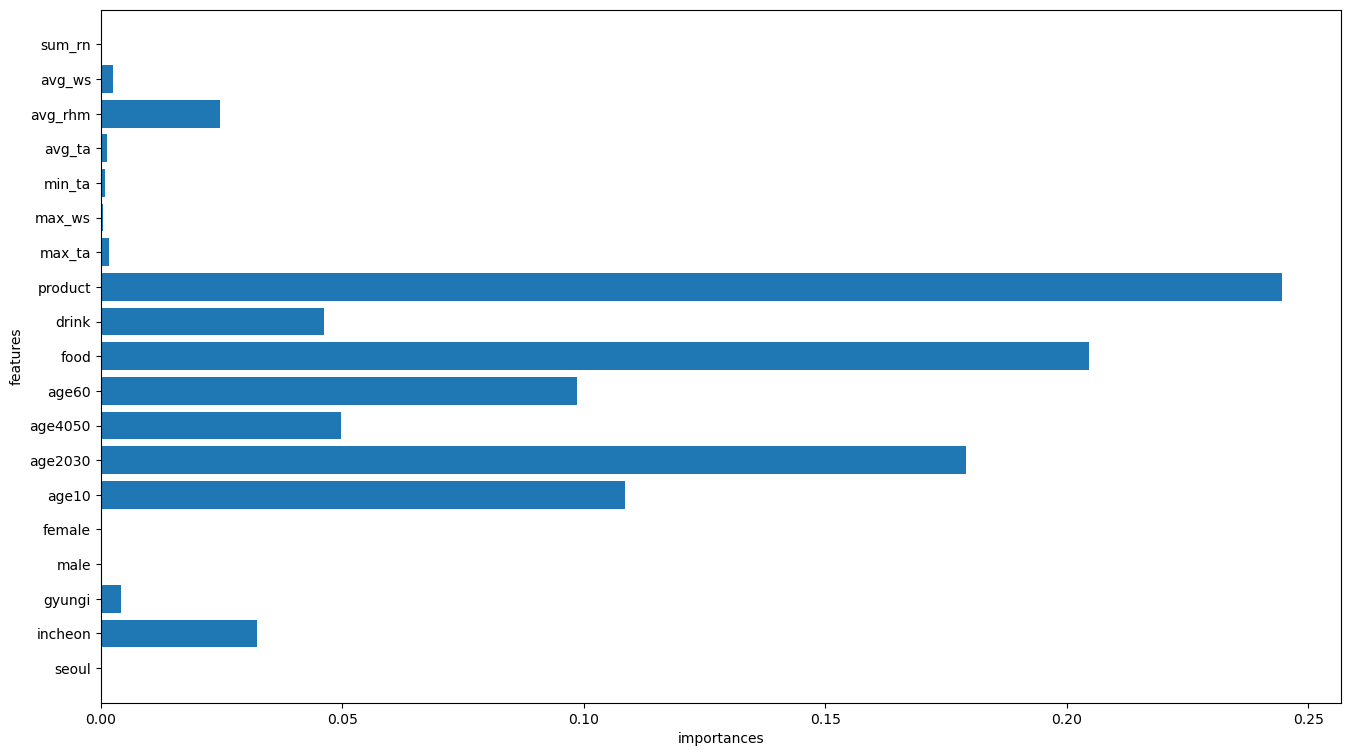

In [20]:
rf=grid.best_estimator_['clf']
plot_tree(rf) #product?food>age2030

##### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

{'clf__n_neighbors': 10}
0.6088602696867671


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6088602696867671]

##### 인공신경망

In [23]:
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
    'clf__hidden_layer_sizes': [(50,), (100,)],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__hidden_layer_sizes': (50,)}
0.5447420515320358


In [24]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6088602696867671,
 0.5447420515320358]

##### SVM

In [25]:
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.01, 0.1],
    'clf__gamma': [0.001, 0.01],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1, 'clf__gamma': 0.01}
0.6886822179473965


In [26]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6088602696867671,
 0.5447420515320358,
 0.6886822179473965]

In [27]:
from sklearn.neural_network import MLPClassifier
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',MLPClassifier(random_state=0,max_iter=5000))
])
params={
    'clf__hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'clf__activation': ['tanh','relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid.fit(X,y)

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(grid.best_params_)

In [ ]:
scores.append(grid.best_score_)
scores

##### Keras

In [ ]:
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers
def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=(X.shape[1],)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss='binary_crossentropy',
                    optimizer=optimizer, 
                    metrics=["accuracy"]) # 성능 지표
    return network

In [ ]:
neural_network = KerasClassifier(model=create_network, verbose=0)
# 하이퍼파라미터 탐색 영역을 정의
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',neural_network)
])
params={
    'clf__epochs': [30],
    'clf__batch_size': [32,64],
    'clf__optimizer': ["rmsprop", "adam"],
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid_result = grid.fit(X, y)

In [ ]:
grid_result.best_params_

In [ ]:
scores.append(grid.best_score_)
scores

##### 알고리즘별 예측도 그래프

In [ ]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]
scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스

print(methods)
print(scores_arr)
print("최적의 알고리즘:",methods[idx])
print("최적의 정확도:",max_rate)

plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")